## Name : Vivek Sharma
## Batch : A4-67
## Subject : TA2

## 1. SIFT Feature Detection and Matching


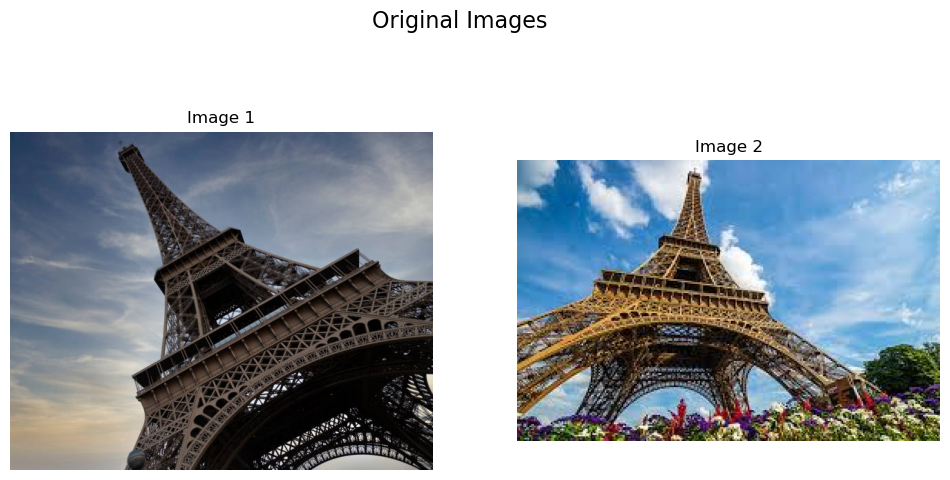

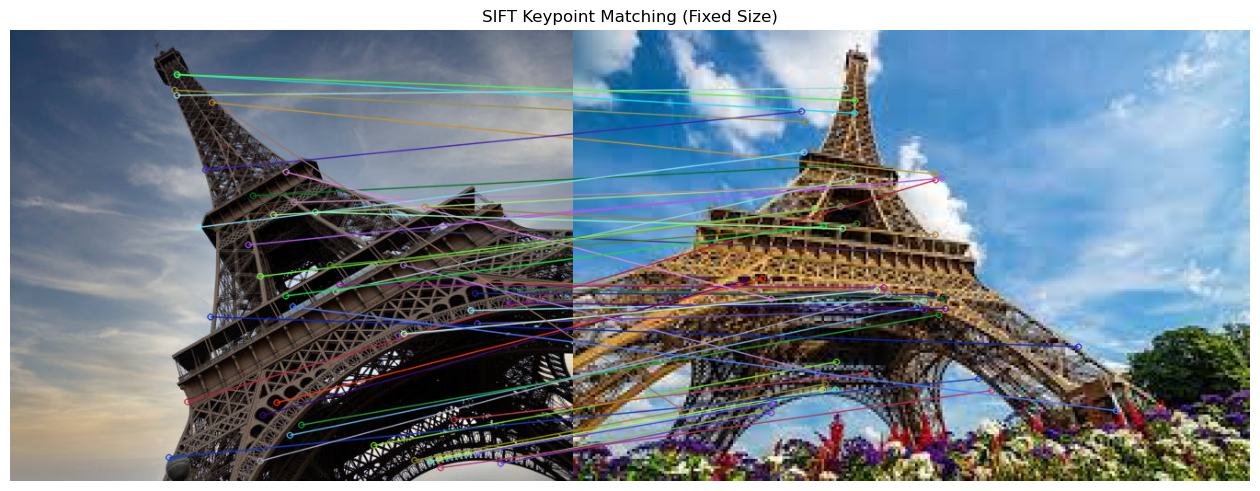

In [54]:
import cv2
import matplotlib.pyplot as plt

def resize_to_same_height(img1, img2):
    h1 = img1.shape[0]
    h2 = img2.shape[0]
    if h1 != h2:
        scale = h1 / h2
        new_w = int(img2.shape[1] * scale)
        img2 = cv2.resize(img2, (new_w, h1), interpolation=cv2.INTER_AREA)
    return img2

def detect_and_match_sift(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    if img1 is None or img2 is None:
        print("Error: One or both image paths are incorrect.")
        return

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2')
    plt.axis('off')

    plt.suptitle('Original Images', fontsize=16)
    plt.show()

    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    img2_resized = resize_to_same_height(img1, img2)
    gray2_resized = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2_resized, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    matched_img = cv2.drawMatches(img1, keypoints1, img2_resized, keypoints2, matches[:50], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(16, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('SIFT Keypoint Matching (Fixed Size)')
    plt.show()

detect_and_match_sift('img1.jpg', 'img2.jpg')


## 2. Harris Corner Detector


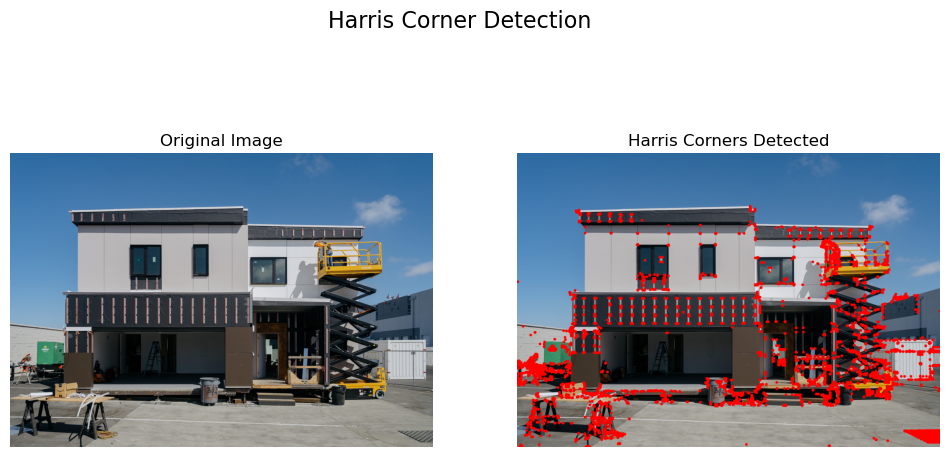

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Image path is incorrect.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    dst = cv2.dilate(dst, None)

    img_with_corners = img.copy()
    threshold = 0.01 * dst.max()
    corners = np.argwhere(dst > threshold)

    for y, x in corners:
        cv2.circle(img_with_corners, (x, y), radius=5, color=(0, 0, 255), thickness=-1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
    plt.title('Harris Corners Detected')
    plt.axis('off')

    plt.suptitle('Harris Corner Detection', fontsize=16)
    plt.show()

harris_corner_detection('Harris.jpg')


## 3 Shi-Tomasi corner detection


C:\Users\Asus\AppData\Local\Temp\ipykernel_24308\1213672758.py:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


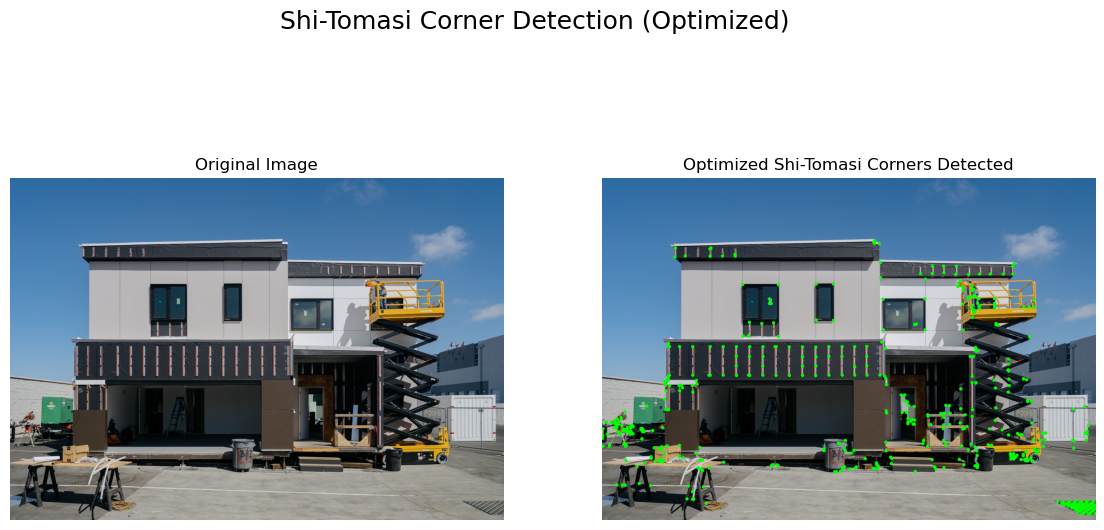

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shi_tomasi_corner_detection(img_path):
    img = cv2.imread('Harris.jpg')
    if img is None:
        print("Error: Image path is incorrect.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(
        gray,
        maxCorners=500,
        qualityLevel=0.001,
        minDistance=5,
        blockSize=7
    )

    if corners is not None:
        corners = np.int0(corners)
        img_with_corners = img.copy()
        for i in corners:
            x, y = i.ravel()
            cv2.circle(img_with_corners, (x, y), radius=7, color=(0, 255, 0), thickness=-1)
    else:
        print("No corners detected.")
        return

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
    plt.title('Optimized Shi-Tomasi Corners Detected')
    plt.axis('off')

    plt.suptitle('Shi-Tomasi Corner Detection (Optimized)', fontsize=18)
    plt.show()

shi_tomasi_corner_detection('Harris.jpg')


## Conclusion

During my experiment with the test image, I changed certain parameter values and observed the following effects:

### 1. SIFT Feature Matching
- **Initial Ratio Threshold:** 0.75  
- **Changed to:** 0.80  
- **Observation:** Increasing the ratio threshold resulted in more matches, but also introduced more false matches, reducing accuracy. Lowering it to 0.70 reduced false matches but also missed some valid key points.

### 2. Harris Corner Detection
- **Initial Sensitivity Factor (k):** 0.04  
- **Changed to:** 0.05  
- **Observation:** Increasing the sensitivity factor detected fewer corners, missing some edges. When reduced to 0.03, more corners were detected, but there was noise and false detections.

- **Initial Block Size:** 3  
- **Changed to:** 4  
- **Observation:** A larger block size resulted in more robust corner detection but missed finer details. Reducing it to 2 detected more corners but introduced noise.

### 3. Shi-Tomasi Corner Detection
- **Initial Quality Level:** 0.01  
- **Changed to:** 0.015  
- **Observation:** Increasing the quality level reduced the number of detected corners, keeping only the strongest ones. Lowering it to 0.005 detected more corners, but some were false detections.

- **Initial Minimum Distance:** 10  
- **Changed to:** 8  
- **Observation:** Reducing the minimum distance resulted in more clustered corner detections, leading to redundancy. Increasing it to 12 spaced out the detected corners but missed some important key points.

### Final Insight
I observed that adjusting these parameters significantly impacted the accuracy of feature detection and corner detection. Fine-tuning these values is necessary for optimal results, depending on the application.